In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [150]:
df=pd.read_csv(r"C:\Users\user\Downloads\day.csv")

In [14]:
df.sample(10)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
631,632,24-09-2019,4,1,9,0,2,1,1,21.080847,25.12565,49.2917,9.541068,1001,6435,7436
171,172,21-06-2018,3,0,6,0,4,1,2,27.914153,31.88230,77.0417,11.458675,774,4061,4835
364,365,31-12-2018,1,0,12,0,1,1,1,16.810000,20.70605,61.5833,14.750318,665,1820,2485
316,317,13-11-2018,4,0,11,0,2,1,1,18.074153,21.52750,45.8333,18.875307,1004,2713,3717
329,330,26-11-2018,4,0,11,0,1,1,1,15.409153,19.25435,68.1667,4.584194,1249,1819,3068
422,423,27-02-2019,1,1,2,0,3,1,1,15.033347,17.89770,49.0833,17.958211,253,4069,4322
126,127,07-05-2018,2,0,5,0,1,1,1,21.320000,25.63105,54.1250,10.750150,1612,3102,4714
551,552,06-07-2019,3,1,7,0,6,0,1,33.961653,37.62665,45.0833,9.791514,1366,4841,6207
682,683,14-11-2019,4,1,11,0,4,1,1,11.855847,14.07815,55.2083,13.374875,373,5122,5495
475,476,21-04-2019,2,1,4,0,0,0,1,23.370000,27.14605,68.2917,19.000329,2541,4083,6624


 Checking for null values and data types of features 

In [37]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


No null values found in our dataset

In [196]:
# Let's look at some statistical information about our dataframe.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [151]:
# 'instant' will not explain anything. Hence removing it
df = df.drop(['instant'], axis=1)
df.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Performing numerical and categorical analysis on the data


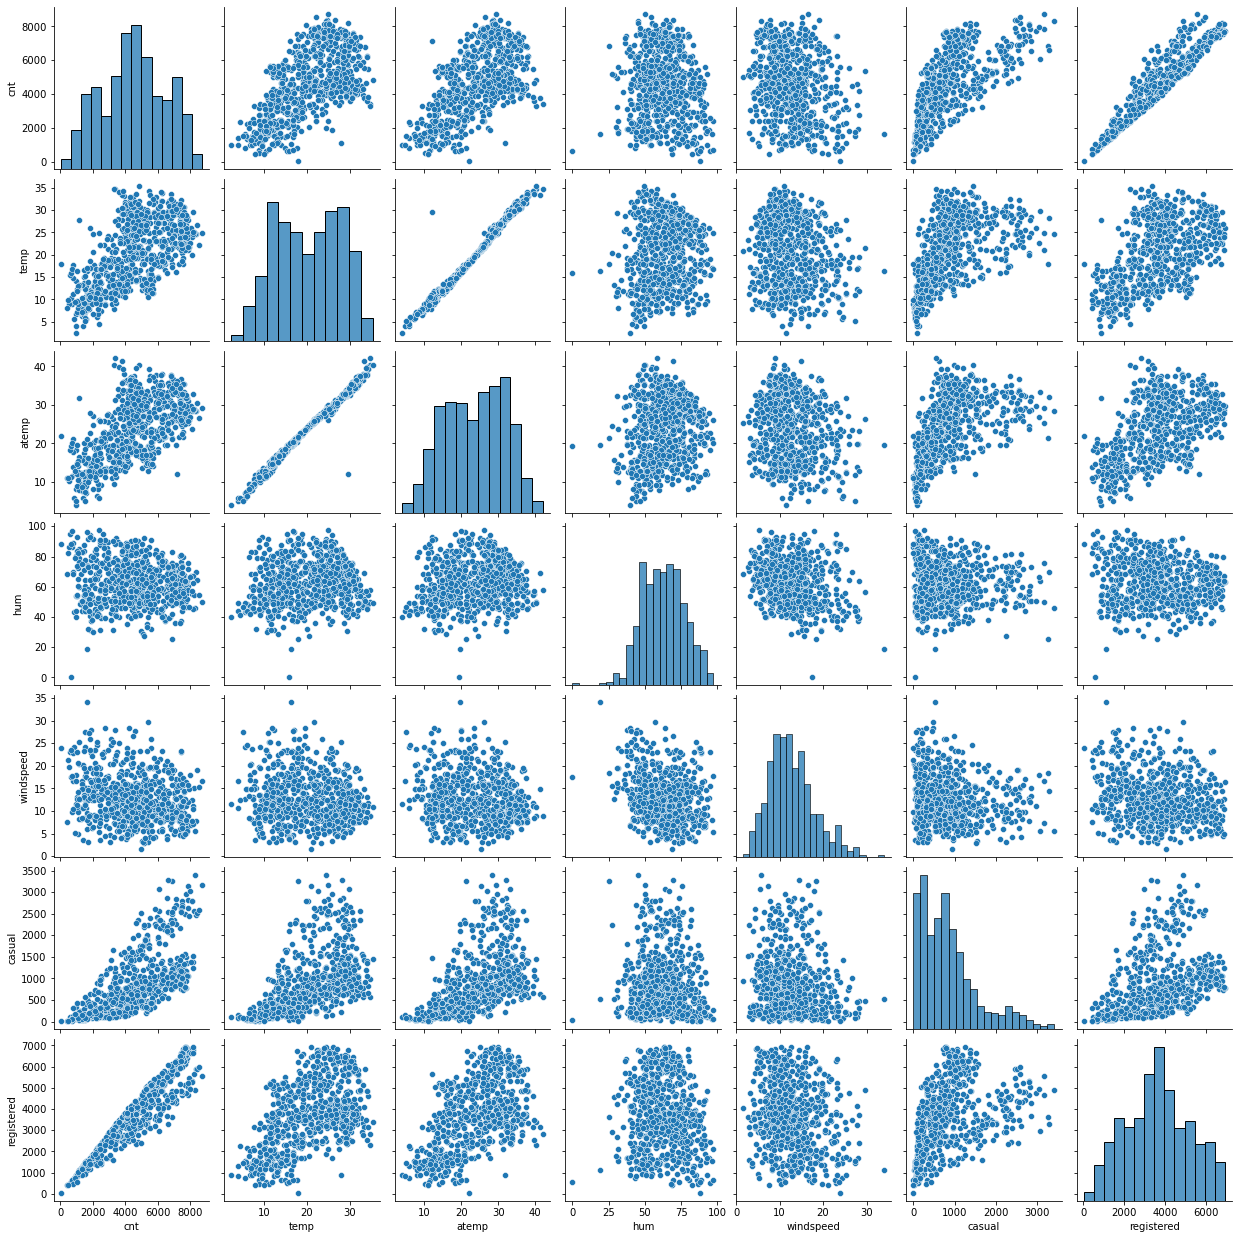

In [139]:
# Pair Plot for numerical variables

vars=["cnt","temp","atemp","hum","windspeed","casual","registered"]
sns.pairplot(df[vars])
plt.show()

temp and atemp have highest corelation with the target variable cnt



temp and atemp are highly co-related with each other



As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp.

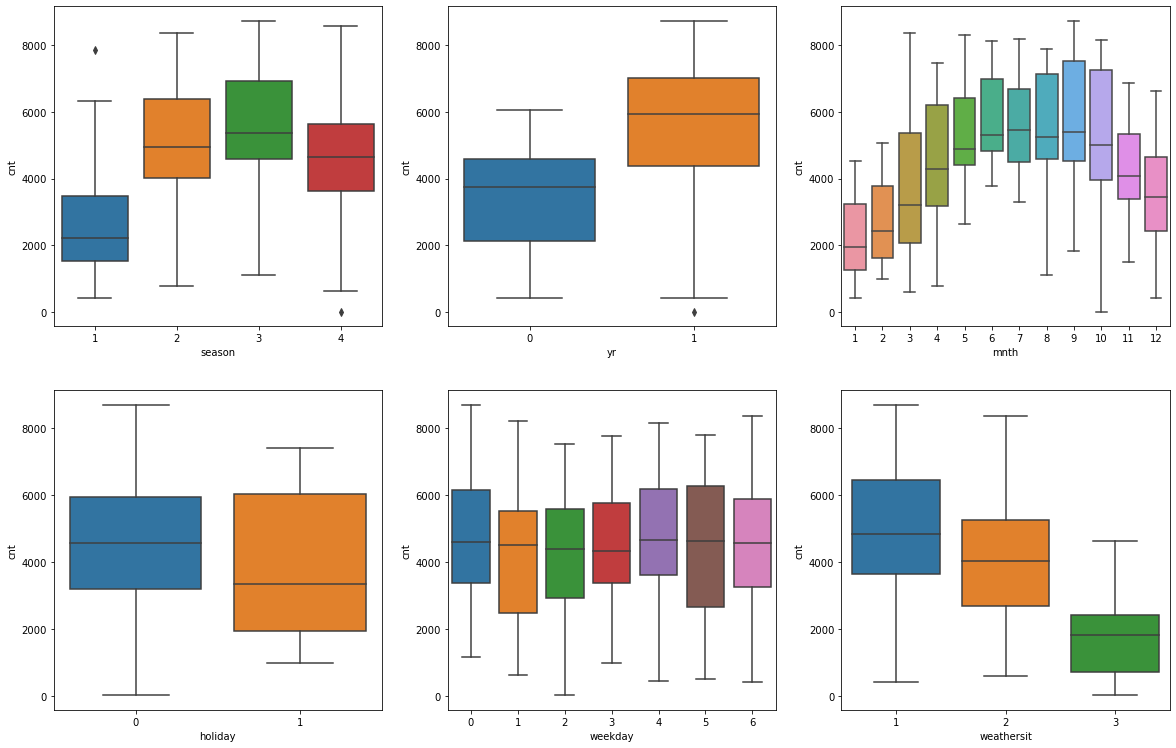

In [21]:
# Box Plots for categorical variables

plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=df)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=df)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.show()

Inferences from EDA of categorical and numerical variables:



Season - We can notice a positive trend in the number of customers in 2 - Summer, 3 - Fall and 4 - Winter seasons



Year - The overall business shows an increasing trend in their user base year on year



Month - Similar to the season trend, there is a postive trend in the months of summer, fall and winter.



Holiday : On holidays, the users show a wider spread in the counts. On normal days, the users are more than holidays



Weekday : Weekdays or weekends do not show any specific trend here.



Weathersit : Clearer weathers show a postive trend in the number of bike users 


During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

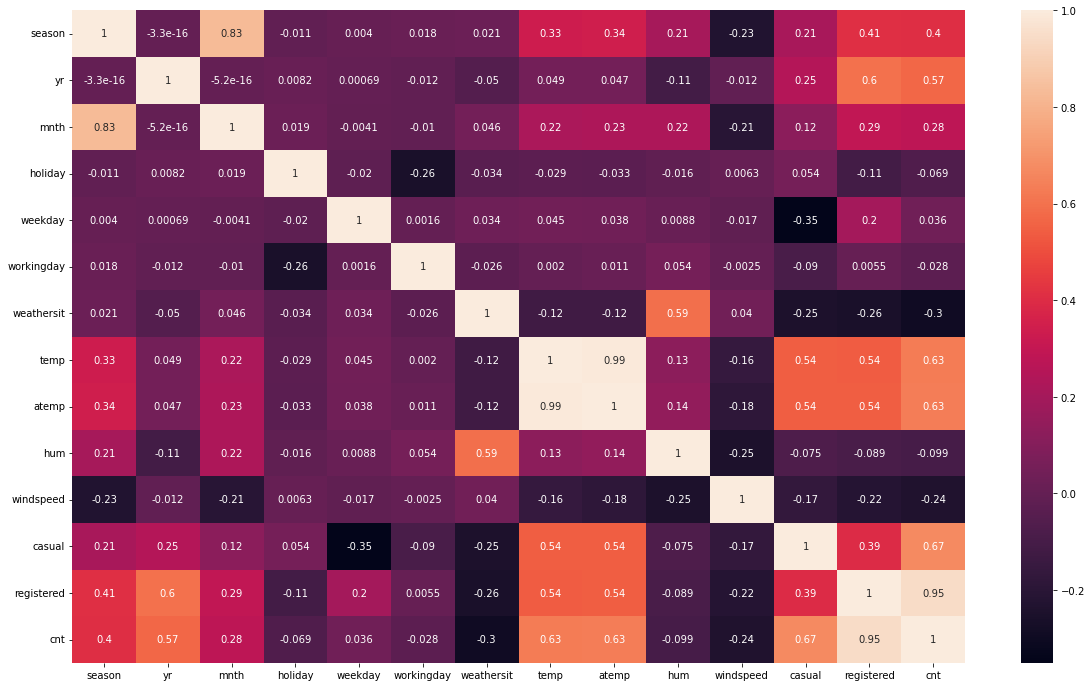

In [23]:
#Visualizing correlations among the variables using a heatmap

plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(),annot=True)
plt.show()

From heatmap, we infer that the following variables show the most correlation with the target variable:
    
    
    
temperature



season



month



user types: instant, registered and causal
    
    
    
and season

Converting categorical variables using dummy variables

#List of categorical variables:
season : 1:spring, 2:summer, 3:fall, 4:winter
yr: 0: 2018, 1:2019
months : 1 to 12
holiday : 0 and 1
workingday : 0 and 1
weekday : 1 to 6
weathersit : 1, 2, 3 and 4
From the list of columns we do not need to convert yr, holiday and workingday since they are already in a binary format. We will go ahead with converting the other columns.



In [21]:
df.dtypes

dteday         object
season         object
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
spring          uint8
summer          uint8
winter          uint8
dtype: object

In [152]:
#Converting season, weathersit , month, weekday to categorical types

df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday =df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [153]:
df.dtypes

dteday         object
season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [154]:
df.sample(10)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
687,19-11-2019,winter,1,nov,0,tue,1,moderate,15.614153,18.78105,62.3333,15.749489,449,5050,5499
356,23-12-2018,spring,0,dec,0,sun,0,good,15.306653,18.87565,68.6250,18.374482,163,2046,2209
349,16-12-2018,winter,0,dec,0,sun,0,moderate,15.375000,17.99125,50.0417,17.458525,178,3399,3577
126,07-05-2018,summer,0,may,0,mon,1,good,21.320000,25.63105,54.1250,10.750150,1612,3102,4714
226,15-08-2018,fall,0,aug,0,wed,1,good,27.299153,30.80835,71.2083,13.999918,775,3563,4338
266,24-09-2018,winter,0,sept,0,mon,1,moderate,24.873347,28.22060,86.2500,5.251681,1776,3647,5423
15,16-01-2018,spring,0,jan,0,tue,1,good,9.498347,11.71085,48.3750,12.625011,251,953,1204
681,13-11-2019,winter,1,nov,0,wed,1,moderate,14.076653,16.16125,66.2917,22.917082,327,3767,4094
285,13-10-2018,winter,0,oct,0,sat,0,moderate,24.155847,27.59020,89.6667,9.499729,290,2623,2913
391,27-01-2019,spring,1,jan,0,sun,0,moderate,17.425000,20.76915,74.1250,22.958689,269,3187,3456


In [155]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])
#Dropping the first columns as (p-1) dummies can explain p categories.
#In 'weathersit', first column was not dropped so as to not lose the information about severe weather situation.

In [156]:
df.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'casual', 'registered', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov',
       'mnth_oct', 'mnth_sept', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed', 'weathersit_bad',
       'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [157]:
# Dropping other irrelevant categorical variables like date from the dataset as we have already have month and weekday columns 
#to work with
df.drop(columns=['dteday'], inplace=True)

# Dropping casual and registered columns as as we have cnt column which is sum of the both that is the target column
df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

In [158]:
df.sample(8)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
515,1,0,1,27.880000,31.56645,49.2917,13.083693,7338,0,1,...,0,0,0,0,0,0,0,0,1,0
145,0,0,0,29.041653,32.73440,67.7500,13.376014,4677,0,1,...,0,0,1,0,0,0,0,0,1,0
450,1,0,1,13.256653,15.78270,29.0000,12.541864,5102,0,1,...,0,0,0,0,0,0,1,0,1,0
372,1,0,1,13.837500,17.01290,46.5000,12.833314,3425,1,0,...,0,0,0,0,0,1,0,0,1,0
424,1,0,1,19.919153,23.76855,61.5417,15.208129,4990,1,0,...,0,0,0,0,0,0,0,0,1,0
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,1,0,0,1
336,0,0,1,12.265847,15.53020,61.2917,6.417481,3614,0,0,...,0,1,0,0,0,0,0,0,1,0
481,1,0,0,18.757500,22.63185,40.0833,23.291411,6233,0,1,...,0,0,1,0,0,0,0,0,1,0


Splitting the dataset into test and training datasets

In [159]:
#Train Test split with 70:30 ratio
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=50)

# Checking the shape of train dataset

print(df_train.shape)

# Checking the shape of test dataset

print(df_test.shape)


(510, 31)
(219, 31)


Resclaing the feature variables

In [160]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','cnt'] ##333333  INCLUDE CNT HERE3333333333###########################################3

from sklearn.preprocessing import MinMaxScaler

#Using Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [161]:
#viewing stats for Training set after scaling
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.698039,0.552680,0.545242,0.644848,0.318203,0.509945,0.245098,0.254902,...,0.064706,0.137255,0.149020,0.133333,0.145098,0.149020,0.149020,0.031373,0.627451,0.341176
std,0.500179,0.151726,0.459559,0.230600,0.223322,0.149640,0.167086,0.223408,0.430568,0.436234,...,0.246248,0.344454,0.356457,0.340268,0.352545,0.356457,0.356457,0.174494,0.483958,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343347,0.345522,0.524581,0.197916,0.350523,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.553497,0.556759,0.648347,0.295422,0.516222,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.757231,0.732269,0.752576,0.406471,0.672141,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [162]:
# Creating our feature and target variable datasets in y_train and X_train

y_train=df_train.pop('cnt') # y will have target feature only
X_train=df_train[:]


Building a Model using RFE

In [163]:
#Using RFE to eliminate some columns
# Building a Linear Regression model using SKLearn for RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [164]:
# Setting number of features to 15 first
import sklearn.feature_selection
from sklearn.feature_selection import RFE
rfe=RFE(lr,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

# Viewing Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 15),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 7),
 ('mnth_jan', False, 5),
 ('mnth_jul', False, 6),
 ('mnth_jun', False, 10),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 9),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 11),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 12),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 4)]

In [165]:
# Storing variables with significant weights in a variable
rfe_vars=X_train.columns[rfe.support_]
rfe_vars

#Building the model using RFE selected variables

#Creating a train dataset using RFE variables
X_train_rfe=X_train[rfe_vars]
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_sept,weekday_sat,weekday_sun,weathersit_bad,weathersit_good
707,1,0,1,0.417140,0.434610,0.933018,0.243629,0,0,1,0,0,0,0,0
172,0,0,1,0.865247,0.858891,0.729068,0.274549,0,0,0,0,0,0,0,1
14,0,0,1,0.223565,0.236172,0.513954,0.243603,1,0,0,0,0,0,0,0
204,0,0,1,0.989306,1.000000,0.567625,0.267859,0,0,0,0,0,0,0,1
182,0,0,1,0.871664,0.821838,0.458136,0.150755,0,0,0,0,0,0,0,1


In [166]:
X_train_rfe.shape

(510, 15)

In [167]:
# Adding a constant to X_train_rfe

X_train_rfe=sm.add_constant(X_train_rfe)
X_train_rfe.head()


,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_sept,weekday_sat,weekday_sun,weathersit_bad,weathersit_good
707,1.0,1,0,1,0.417140,0.434610,0.933018,0.243629,0,0,1,0,0,0,0,0
172,1.0,0,0,1,0.865247,0.858891,0.729068,0.274549,0,0,0,0,0,0,0,1
14,1.0,0,0,1,0.223565,0.236172,0.513954,0.243603,1,0,0,0,0,0,0,0
204,1.0,0,0,1,0.989306,1.000000,0.567625,0.267859,0,0,0,0,0,0,0,1
182,1.0,0,0,1,0.871664,0.821838,0.458136,0.150755,0,0,0,0,0,0,0,1


In [168]:
# Creating a LR object which we will use to fit the line.
lr2 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     182.5
Date:                Sun, 28 May 2023   Prob (F-statistic):          2.46e-190
Time:                        09:54:11   Log-Likelihood:                 520.12
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3343      0.081      4.132      0.000       0.175       0.493
yr                  0.2296      0.008     28.754      0.000       0.214       0.245
holiday            -0.1467      0.064     -2.296      0.022      -0.272      -0.021
workingday         -0.0963      0.070     -1.370      0.171      -0.234       0.042
temp                0.4781      0.130      3.679      0.000       0.223       0.733
atemp               0.0596      0.129      0.460      0.645      -0.195       0.314
hum                -0.2185      0.037     -5.833      0.000      -0.292      -0.145
windspeed          -0.1858      0.026     -7.148      0.000      -0.237      -0.135
season_spring      -0.0480      0.021     -2.316      0.021      -0.089      -0.007
season_summer       0.0656      0.014      4.747      0.000       0.038       0.093
season_winter       0.1147      0.017      6.646      0.000       0.081       0.149
mnth_sept           0.0831      0.017      4.781      0.000       0.049       0.117
weekday_sat        -0.0826      0.070     -1.179      0.239      -0.220       0.055
weekday_sun        -0.0672      0.070     -0.959      0.338      -0.205       0.070
weathersit_bad     -0.1557      0.024     -6.455      0.000      -0.203      -0.108
weathersit_good     0.0412      0.011      3.872      0.000       0.020       0.062
==============================================================================
Omnibus:                       70.929   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.732
Skew:                          -0.740   Prob(JB):                     4.61e-36
Kurtosis:                       5.338   Cond. No.                         87.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the p-values, we can see that we have some variables with high p - values or variables which are not significant. eg "atemp", "temp"

In [169]:
#Calculating VIF for model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,389.81
4,atemp,376.51
2,workingday,49.86
5,hum,35.71
11,weekday_sat,11.03
12,weekday_sun,9.56
7,season_spring,6.19
6,windspeed,5.54
9,season_winter,4.68
14,weathersit_good,4.40


Dropping insignificant variables and running the model.



we can see some variables have high p-values like 'atemp'. Such variables are insignificant and should be dropped.



We will start with dropping a single variable and recalculate its impact on other variables. Since 'atemp' has the highest p-value and and VIF>5. We will drop this variable

In [170]:
# Dropping 'atemp' variable
X_train_rfe.drop(columns='atemp', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr3 = sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.8
Date:                Sun, 28 May 2023   Prob (F-statistic):          1.92e-191
Time:                        09:54:36   Log-Likelihood:                 520.01
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     495   BIC:                            -946.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3336      0.081      4.128      0.000       0.175       0.492
yr                  0.2296      0.008     28.773      0.000       0.214       0.245
holiday            -0.1469      0.064     -2.301      0.022      -0.272      -0.021
workingday         -0.0961      0.070     -1.369      0.172      -0.234       0.042
temp                0.5360      0.033     16.364      0.000       0.472       0.600
hum                -0.2172      0.037     -5.819      0.000      -0.291      -0.144
windspeed          -0.1878      0.026     -7.343      0.000      -0.238      -0.138
season_spring      -0.0470      0.021     -2.284      0.023      -0.088      -0.007
season_summer       0.0668      0.014      4.916      0.000       0.040       0.093
season_winter       0.1159      0.017      6.801      0.000       0.082       0.149
mnth_sept           0.0834      0.017      4.802      0.000       0.049       0.117
weekday_sat        -0.0830      0.070     -1.186      0.236      -0.221       0.055
weekday_sun        -0.0671      0.070     -0.958      0.338      -0.205       0.070
weathersit_bad     -0.1564      0.024     -6.505      0.000      -0.204      -0.109
weathersit_good     0.0414      0.011      3.894      0.000       0.021       0.062
==============================================================================
Omnibus:                       70.517   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.884
Skew:                          -0.736   Prob(JB):                     7.04e-36
Kurtosis:                       5.335   Cond. No.                         70.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Dropping the above mentioned variable increased adj r square value by 0.001

In [171]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,49.84
4,hum,35.54
3,temp,23.11
10,weekday_sat,10.99
11,weekday_sun,9.55
6,season_spring,6.13
5,windspeed,5.37
8,season_winter,4.57
13,weathersit_good,4.39
7,season_summer,2.93


In [172]:
# Re building the model after dropping 'hum' variable as it has high VIF.

X_train_rfe.drop(columns='hum', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr4= sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.3
Date:                Sun, 28 May 2023   Prob (F-statistic):          1.62e-185
Time:                        09:56:57   Log-Likelihood:                 503.14
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1819      0.079      2.303      0.022       0.027       0.337
yr                  0.2350      0.008     28.727      0.000       0.219       0.251
holiday            -0.1381      0.066     -2.095      0.037      -0.268      -0.009
workingday         -0.0873      0.072     -1.204      0.229      -0.230       0.055
temp                0.4889      0.033     14.917      0.000       0.424       0.553
windspeed          -0.1432      0.025     -5.682      0.000      -0.193      -0.094
season_spring      -0.0618      0.021     -2.927      0.004      -0.103      -0.020
season_summer       0.0588      0.014      4.213      0.000       0.031       0.086
season_winter       0.0944      0.017      5.497      0.000       0.061       0.128
mnth_sept           0.0679      0.018      3.831      0.000       0.033       0.103
weekday_sat        -0.0687      0.072     -0.952      0.342      -0.211       0.073
weekday_sun        -0.0528      0.072     -0.731      0.465      -0.195       0.089
weathersit_bad     -0.1843      0.024     -7.575      0.000      -0.232      -0.137
weathersit_good     0.0786      0.009      8.973      0.000       0.061       0.096
==============================================================================
Omnibus:                       72.598   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.578
Skew:                          -0.761   Prob(JB):                     1.83e-36
Kurtosis:                       5.330   Cond. No.                         65.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [173]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,32.62
3,temp,19.97
9,weekday_sat,7.75
10,weekday_sun,6.61
5,season_spring,5.76
4,windspeed,4.98
7,season_winter,4.17
12,weathersit_good,2.93
6,season_summer,2.84
0,yr,1.96


In [174]:
#Re building the model by dropping 'workingday' but not dropping 'temp' variable as it might be important from business point of view

X_train_rfe.drop(columns='workingday', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr5= sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.3
Date:                Sun, 28 May 2023   Prob (F-statistic):          2.24e-186
Time:                        09:59:52   Log-Likelihood:                 502.39
No. Observations:                 510   AIC:                            -978.8
Df Residuals:                     497   BIC:                            -923.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0940      0.030      3.113      0.002       0.035       0.153
yr                  0.2357      0.008     28.850      0.000       0.220       0.252
holiday            -0.0656      0.027     -2.437      0.015      -0.119      -0.013
temp                0.4908      0.033     14.989      0.000       0.427       0.555
windspeed          -0.1443      0.025     -5.728      0.000      -0.194      -0.095
season_spring      -0.0605      0.021     -2.868      0.004      -0.102      -0.019
season_summer       0.0590      0.014      4.228      0.000       0.032       0.086
season_winter       0.0938      0.017      5.461      0.000       0.060       0.128
mnth_sept           0.0689      0.018      3.893      0.000       0.034       0.104
weekday_sat         0.0171      0.012      1.479      0.140      -0.006       0.040
weekday_sun         0.0329      0.012      2.704      0.007       0.009       0.057
weathersit_bad     -0.1841      0.024     -7.561      0.000      -0.232      -0.136
weathersit_good     0.0782      0.009      8.925      0.000       0.061       0.095
==============================================================================
Omnibus:                       73.567   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.015
Skew:                          -0.770   Prob(JB):                     5.41e-37
Kurtosis:                       5.343   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [175]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.85
3,windspeed,4.70
11,weathersit_good,2.84
4,season_spring,1.99
0,yr,1.96
5,season_summer,1.89
6,season_winter,1.64
8,weekday_sat,1.21
7,mnth_sept,1.19
9,weekday_sun,1.19


In [180]:
#Re building the model by dropping 'weekday_sat' as it has high p value
X_train_rfe.drop(columns='weekday_sat', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr6= sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.8
Date:                Sun, 28 May 2023   Prob (F-statistic):          4.29e-187
Time:                        10:05:47   Log-Likelihood:                 501.28
No. Observations:                 510   AIC:                            -978.6
Df Residuals:                     498   BIC:                            -927.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0958      0.030      3.170      0.002       0.036       0.155
yr                  0.2355      0.008     28.799      0.000       0.219       0.252
holiday            -0.0670      0.027     -2.486      0.013      -0.120      -0.014
temp                0.4927      0.033     15.039      0.000       0.428       0.557
windspeed          -0.1446      0.025     -5.735      0.000      -0.194      -0.095
season_spring      -0.0592      0.021     -2.805      0.005      -0.101      -0.018
season_summer       0.0592      0.014      4.239      0.000       0.032       0.087
season_winter       0.0947      0.017      5.509      0.000       0.061       0.128
mnth_sept           0.0693      0.018      3.911      0.000       0.034       0.104
weekday_sun         0.0300      0.012      2.492      0.013       0.006       0.054
weathersit_bad     -0.1839      0.024     -7.546      0.000      -0.232      -0.136
weathersit_good     0.0777      0.009      8.870      0.000       0.061       0.095
==============================================================================
Omnibus:                       72.465   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.886
Skew:                          -0.758   Prob(JB):                     1.57e-36
Kurtosis:                       5.337   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.72
3,windspeed,4.70
10,weathersit_good,2.84
0,yr,1.96
4,season_spring,1.96
5,season_summer,1.88
6,season_winter,1.62
7,mnth_sept,1.19
8,weekday_sun,1.15
9,weathersit_bad,1.13


In [182]:
#Re building the model by dropping 'holiday' as it has high p value
X_train_rfe.drop(columns='holiday', inplace=True)

# Adding a constant to X_train_rfe
X_train_rfe=sm.add_constant(X_train_rfe)

# Creating a LR object which we will use to fit the line.
lr7= sm.OLS(y_train, X_train_rfe).fit()

#Checking the summary
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Sun, 28 May 2023   Prob (F-statistic):          5.64e-187
Time:                        10:07:23   Log-Likelihood:                 498.13
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     499   BIC:                            -927.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0971      0.030      3.199      0.001       0.037       0.157
yr                  0.2355      0.008     28.649      0.000       0.219       0.252
temp                0.4906      0.033     14.903      0.000       0.426       0.555
windspeed          -0.1475      0.025     -5.826      0.000      -0.197      -0.098
season_spring      -0.0607      0.021     -2.865      0.004      -0.102      -0.019
season_summer       0.0600      0.014      4.274      0.000       0.032       0.088
season_winter       0.0939      0.017      5.437      0.000       0.060       0.128
mnth_sept           0.0665      0.018      3.743      0.000       0.032       0.101
weekday_sun         0.0308      0.012      2.548      0.011       0.007       0.055
weathersit_bad     -0.1823      0.024     -7.444      0.000      -0.230      -0.134
weathersit_good     0.0770      0.009      8.747      0.000       0.060       0.094
==============================================================================
Omnibus:                       73.099   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.290
Skew:                          -0.784   Prob(JB):                     7.00e-35
Kurtosis:                       5.224   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
#Recalculating VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1) # Dropping constant variable from the df

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.72
2,windspeed,4.69
9,weathersit_good,2.83
0,yr,1.96
3,season_spring,1.95
4,season_summer,1.88
5,season_winter,1.62
6,mnth_sept,1.19
7,weekday_sun,1.15
8,weathersit_bad,1.13


We have all of our variables within VIF 5 and almost zero p-values coefficients.



At this stage, we have an adjusted R-sqaure values 0.83 which means our model explains 83% of the variance in the train data.



Let us try to manually add some significant variables to check if it improves our model.


In [184]:
# listing columns which have been used in lr5

X_train_rfe.columns

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_sept', 'weekday_sun', 'weathersit_bad',
       'weathersit_good'],
      dtype='object')

In [185]:
X_train.columns # original training set 

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [186]:
#printing the feature variables used
X_train_rfe.columns

Index(['yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_sept', 'weekday_sun', 'weathersit_bad',
       'weathersit_good'],
      dtype='object')

In [187]:
# Adding the constant

X_train_rfe = sm.add_constant(X_train_rfe)
#Building the model

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
# Printing the summary

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.5
Date:                Sun, 28 May 2023   Prob (F-statistic):          5.64e-187
Time:                        10:09:35   Log-Likelihood:                 498.13
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     499   BIC:                            -927.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0971      0.030      3.199      0.001       0.037       0.157
yr                  0.2355      0.008     28.649      0.000       0.219       0.252
temp                0.4906      0.033     14.903      0.000       0.426       0.555
windspeed          -0.1475      0.025     -5.826      0.000      -0.197      -0.098
season_spring      -0.0607      0.021     -2.865      0.004      -0.102      -0.019
season_summer       0.0600      0.014      4.274      0.000       0.032       0.088
season_winter       0.0939      0.017      5.437      0.000       0.060       0.128
mnth_sept           0.0665      0.018      3.743      0.000       0.032       0.101
weekday_sun         0.0308      0.012      2.548      0.011       0.007       0.055
weathersit_bad     -0.1823      0.024     -7.444      0.000      -0.230      -0.134
weathersit_good     0.0770      0.009      8.747      0.000       0.060       0.094
==============================================================================
Omnibus:                       73.099   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.290
Skew:                          -0.784   Prob(JB):                     7.00e-35
Kurtosis:                       5.224   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [188]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,55.42
4,season_spring,5.00
2,temp,3.46
6,season_winter,3.37
5,season_summer,2.25
7,mnth_sept,1.15
9,weathersit_bad,1.10
10,weathersit_good,1.09
3,windspeed,1.07
1,yr,1.01


No multi collinearity observed as vifs of all variables (excluding constant over here ) is below 5


Residual analysis

Text(0.5, 0, 'Errors')

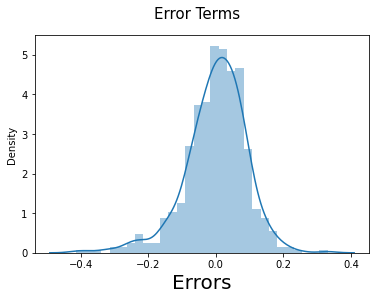

In [189]:
y_train_pred = lm.predict(X_train_rfe)
# Plotting histogram of error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 30)
fig.suptitle('Error Terms', fontsize = 15)                 
plt.xlabel('Errors', fontsize = 20)        

Errors are normally distribured here with mean around 0. So everything seems to be fine

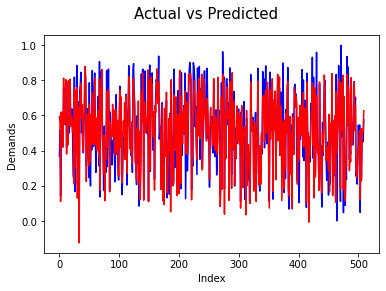

In [190]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted results seem to follow almost the same pattern so this model seems fine

Predicting values for test data set

In [192]:
#Printing the variables to be scaled

num_vars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [193]:
#Applying scaling on test data

df_test[num_vars]=scaler.transform(df_test[num_vars])

df_test.sample(7)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
248,0,0,1,0.617130,0.609325,0.913996,0.646106,0.309250,0,0,...,1,0,0,0,1,0,0,1,0,0
577,1,0,1,0.844927,0.821838,0.698153,0.207278,0.869535,0,0,...,0,0,0,0,1,0,0,0,1,0
628,1,0,0,0.693063,0.688641,0.689137,0.235522,0.937069,0,0,...,1,0,1,0,0,0,0,0,1,0
714,1,0,1,0.389333,0.406377,0.864319,0.119764,0.433042,0,0,...,0,1,0,0,0,0,0,0,0,1
118,0,0,0,0.578629,0.584545,0.471017,0.421286,0.526116,0,1,...,0,0,0,1,0,0,0,0,1,0
162,0,0,1,0.812843,0.788331,0.770717,0.255731,0.510584,0,1,...,0,0,0,0,0,1,0,0,1,0
160,0,0,0,0.893053,0.872112,0.623443,0.205926,0.525081,0,1,...,0,0,0,1,0,0,0,0,1,0


In [194]:
# Splitting target and feature variables

y_test = df_test.pop('cnt')
X_test = df_test[:]

#Printing feature variables

X_train_rfe.columns

Index(['const', 'yr', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_sept', 'weekday_sun', 'weathersit_bad',
       'weathersit_good'],
      dtype='object')

In [195]:
#Dropping constant variable

X_train_rfe.drop(columns='const', inplace=True)

In [196]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
# Making predictions

y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

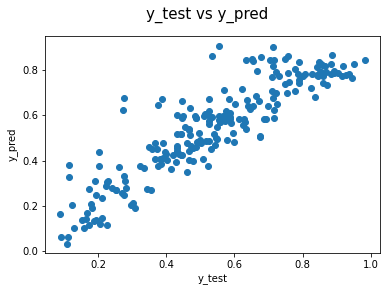

In [197]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=15)             
plt.xlabel('y_test', fontsize=10)                    
plt.ylabel('y_pred', fontsize=10)            

In [198]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_true=y_train, y_pred=y_train_pred))
print(mean_squared_error(y_true=y_test, y_pred=y_pred))

0.008301395126921664
0.010273192266720988


We have a Mean Squared Error close to 0 on the training dataset, meaning our model correctly predicts all variances in the data.



On the test validation dataset, MSE is 0.01 also close to zero, meaning our model performs similarly on unknown data sets too.


In [199]:
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_pred))

0.8333490130638563
0.789421325074684


We have a R-squared value of 83.33 % on train data and 78.9% on test data.


Summary of the assignment:

Interepretation of results



Analysing the above model, the comapany should focus on :



* expanding business during Spring.



* expanding business during September.



* There would be less bookings during Light Snow or Rain i.e. when the weather is not good.




* Conclusion-



Significant variables that predict demand for shared bikes are :



* yr



* temp



* hum



* windspeed



* Season( spring, summer, winter)



* month(September)



* weekday (Sunday)



* weathersit( Light Snow, Mist + Cloudy)